# Apresentação:

    Neste laboratório, usamos a biblioteca sklearn.svm
    para demonstrar o suporteclassificador de vetores
    e a máquina de vetores de suporte.Importamos algumas
    de nossas bibliotecas habituais.

In [144]:
!pip install ISLP

# SVC - Support Vector Classifier:

    Agora usamos a função SupportVectorClassifier()
    (abreviada como SVC()) do pacote sklearn para ajustar
    o classificador de vetores de suporte para um determinado
    valor do parâmetro C. O argumento C nos permite especificar
    o custo de uma violação à margem. Quando o argumento de custo
    é pequeno, as margens serão amplas e muitos vetores de suporte
    estarão na margem ou violarão a margem. Quando o argumento C é
    grande, as margens serão estreitas e haverá poucos vetores de
    suporte na margem ou violando a margem. Aqui, demonstramos o uso
    do SVC() em um exemplo bidimensional, para que possamos plotar a
    fronteira de decisão resultante. Começamos gerando as observações,
    que pertencem a duas classes, e verificando se as classes são
    linearmente separáveis.

In [145]:
from sklearn.svm import  SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

    Usaremos a função RocCurveDisplay.from_estimator() para
    produzir vários gráficos ROC, usando uma abreviação roc_curve.

In [146]:
roc_curve = RocCurveDisplay.from_estimator

In [147]:
import numpy as np
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table

In [148]:
# Gerando dados:
rng = np.random.default_rng(1)
X = rng.standard_normal((50,2))
y = np.array([-1]*25+[1]*25)
X[y==1] += 1

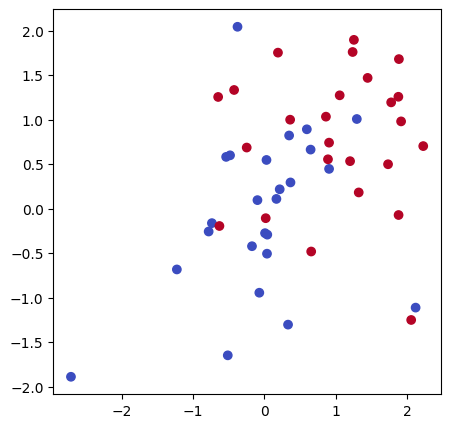

In [149]:
# Visualizando os dados:
fig, ax = subplots(figsize=(5,5))
ax.scatter(X[:,0], X[:,1],
           c=y, cmap=cm.coolwarm)

In [150]:
# Instanciando o modelo e Ajustando:
svm_linear = SVC(C=10, kernel='linear').fit(X, y)

    O classificador de vetores de suporte com duas características
    pode ser visualizado plotando os valores de sua função de decisão.
    Incluímos uma função para isso no pacote ISLP (inspirada por um
    exemplo semelhante na documentação do sklearn).

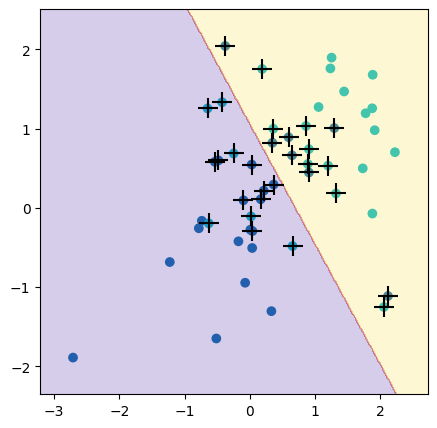

In [151]:
# Visualizando:
fig, ax = subplots(figsize=(5,5))
plot_svm(X,y,svm_linear,ax=ax)

    A fronteira de decisão entre as duas classes é linear
    (porque usamos o argumento kernel='linear'). Os vetores
    de suporte são marcados com + e as demais observações
    são plotadas como círculos.

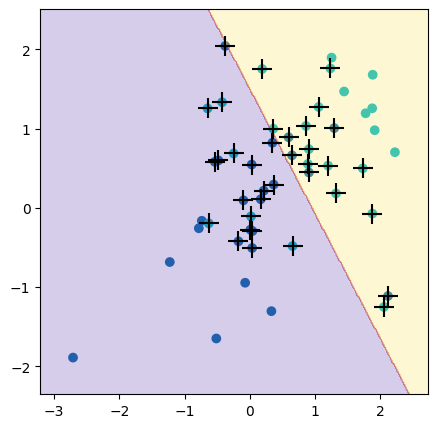

In [152]:
# Testando com um C menor:
svm_linear_small = SVC(C=0.1, kernel='linear')
svm_linear_small.fit(X, y)
fig, ax = subplots(figsize=(5,5))
plot_svm(X,y,svm_linear_small,ax=ax)

    Com um valor menor para o parâmetro de custo, obtemos
    um número maior de vetores de suporte, porque a margem
    agora é mais ampla. Para kernels lineares, podemos extrair
    os coeficientes da fronteira de decisão linear da seguinte
    forma:

In [153]:
print(f'Coeficientes para C=10:\n {svm_linear.coef_}\n\n',
      f' Coeficientes para C=0.1:\n {svm_linear_small.coef_}')

Coeficientes para C=10:
 [[1.17303943 0.77348227]]

  Coeficientes para C=0.1:
 [[0.71529828 0.45433662]]


    Note que C é um hiperparâmetro, então podemos
    otimiza-lo pelo metodo do cross-validation.

In [154]:
kfold = skm.KFold(5, random_state=0, shuffle=True)
grid = skm.GridSearchCV(svm_linear, {'C':[0.001,0.01,0.1,1,5,10,100]},
                      refit=True, cv=kfold, scoring= 'accuracy').fit(X,y)
grid.best_params_

{'C': 1}

    Podemos acessar facilmente os erros de validação cruzada
    para cada um desses modelos em grid.cv_results_. Isso
    imprime muitos detalhes, então extraímos apenas os
    resultados de precisão.

In [155]:
grid.cv_results_

{'mean_fit_time': array([0.00168047, 0.00261054, 0.00154347, 0.00127645, 0.00128088,
        0.00125403, 0.00185261]),
 'std_fit_time': array([8.10216586e-04, 2.03119723e-03, 5.40574398e-04, 9.47016363e-05,
        8.00086146e-05, 7.61929081e-05, 2.17173734e-04]),
 'mean_score_time': array([0.00138292, 0.00129209, 0.00100474, 0.00091052, 0.00094662,
        0.00082688, 0.00083838]),
 'std_score_time': array([1.03884615e-03, 9.33895789e-04, 4.26407863e-04, 8.09296757e-05,
        1.22393018e-04, 2.15678038e-05, 2.35837315e-05]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split1_test_score': array([0.3, 0.3, 0.8, 0.8, 0.8, 0.8, 0.8]),
 'split2_test_score': array([0.6, 0.6, 0

In [156]:
# Analisando informação específica:
grid.cv_results_[('mean_test_score')]

array([0.46, 0.46, 0.72, 0.74, 0.74, 0.74, 0.74])

    Observamos que C=1 resulta na maior precisão de validação
    cruzada de 0,74, embora a precisão seja a mesma para vário
    valores de C. O classificador grid.best_estimator_ pode ser
    usado para prever a etiqueta de classe em um conjunto de
    observações de teste. Vamos gerar um conjunto de dados de
    teste.

In [157]:
# Checando os melhores estimadores:
grid.best_estimator_

SVC(C=1, kernel='linear')

    Agora, prevemos as etiquetas de classe dessas observações
    de teste. Aqui, usamos o melhor modelo selecionado pela
    validação cruzada para fazer as previsões.

In [158]:
# Gerando os dados artificiais:
X_test = rng.standard_normal((20, 2))
y_test = np.array([-1]*10+[1]*10)
X_test[y_test==1] += 1

In [159]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,8,4
1,2,6


    Agora consideramos uma situação em que as duas classes são
    linearmente separáveis. Então podemos encontrar um hiperplano
    de separação ótimo usando o estimador SVC(). Primeiro, separamos
    ainda mais as duas classes em nossos dados simulados para que
    sejam linearmente separáveis.







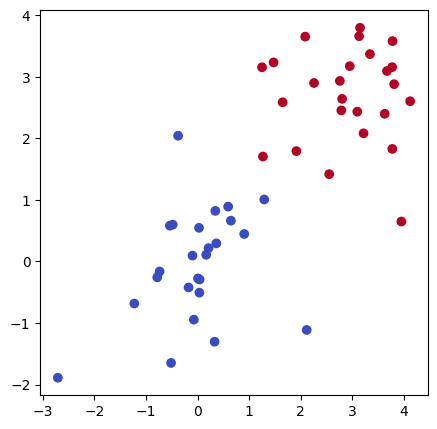

In [160]:
X[y==1] += 1.9;
fig, ax = subplots(figsize=(5,5))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm);

    Vemos agora que os dados são visualmente linearmente separáveis.

In [161]:
svm_ = SVC(C=1e5, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat, y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


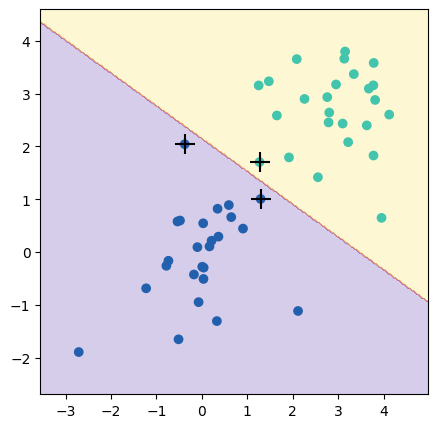

In [162]:
fig, ax = subplots(figsize=(5,5))
plot_svm(X,y,svm_,ax=ax)

# SVM - Support Vector Machine:

    Para ajustar uma SVM usando um kernel não linear, mais uma vez
    usamos o estimador SVC(). No entanto, agora usamos um valor diferente
    para o parâmetro kernel. Para ajustar uma SVM com um kernel polinomial,
    usamos kernel="poly", e para ajustar uma SVM com um kernel radial,
    usamos kernel="rbf". No primeiro caso, também usamos o argumento
    degree para especificar um grau para o kernel polinomial, e no
    último caso, usamos o gamma para especificar um valor de γ para
    o kernel de base radial. Primeiro, geraremos alguns dados
    com uma fronteira de classe não linear, da seguinte forma:

In [163]:
# Dados artificiais:
X = rng.standard_normal((200, 2))
X[:100] += 2
X[100:150] -= 2
y = np.array([1]*150+[2]*50)

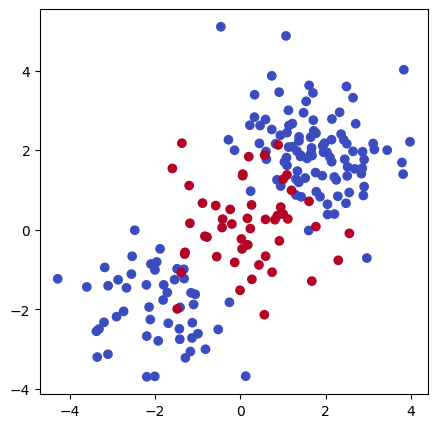

In [164]:
# Visualização:
fig, ax = subplots(figsize=(5,5))
ax.scatter(X[:,0],X[:,1],c=y,cmap=cm.coolwarm)

    Os dados são divididos aleatoriamente em grupos de
    treinamento e teste. Em seguida, ajustamos os dados
    de treinamento usando o estimador SVC()
    com um kernel radial e γ = 1:

In [165]:
# Separando os dados:
(X_train,X_test,y_train,y_test) = skm.train_test_split(X,y,test_size=0.5,random_state=0)

# Treinando o modelo:
svm_rbf = SVC(kernel="rbf", gamma=1, C=1)
svm_rbf.fit(X_train, y_train)

SVC(C=1, gamma=1)

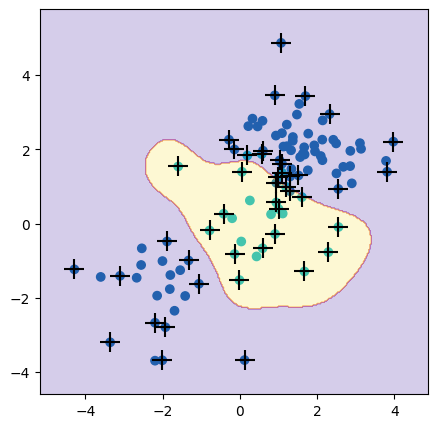

In [166]:
# Visualização:
fig, ax = subplots(figsize=(5,5))
plot_svm(X_train,y_train,svm_rbf,ax=ax)

    Podemos observar na figura que há um número significativo de
    erros de treinamento nesse ajuste da SVM. Se aumentarmos o
    valor de C, podemos reduzir a quantidade de erros de treinamento.
    No entanto, isso vem com o custo de uma fronteira de decisão mais
    irregular, que parece estar em risco de ajustar-se em excesso aos
    dados.

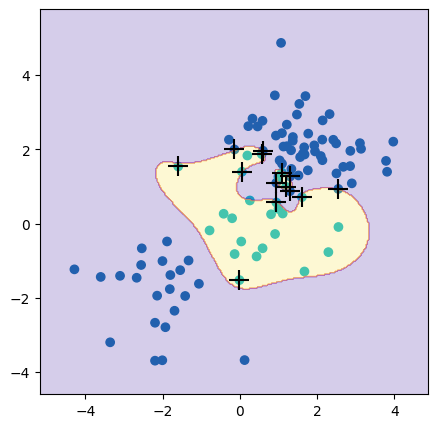

In [167]:
# Checando o mesmo gráfico com alguns ajustes:
svm_rbf = SVC(kernel="rbf", gamma=1, C=1e5)
svm_rbf.fit(X_train, y_train)
fig, ax = subplots(figsize=(5,5))
plot_svm(X_train,y_train,svm_rbf,ax=ax)

    A melhor opção de fato é o cross-validation para escolher
    a melhor configuração de hiperparâmetros. Tendo em vista
    que gamma é um hiperparâmetro.

In [168]:
# Validação Cruzada:
kfold = skm.KFold(5, random_state=0,shuffle=True)
grid = skm.GridSearchCV(svm_rbf,{'C':[0.1,1,10,100,1000],'gamma':[0.5,1,2,3,4]},
                        refit=True,cv=kfold,scoring='accuracy')

grid.fit(X_train, y_train)
grid.best_params_

{'C': 1, 'gamma': 0.5}

In [169]:
grid.best_params_

{'C': 1, 'gamma': 0.5}

    Ajustando o modelo então aos melhores hiperparâmetros.

Truth,1,2
Predicted,,
1,69,6
2,6,19


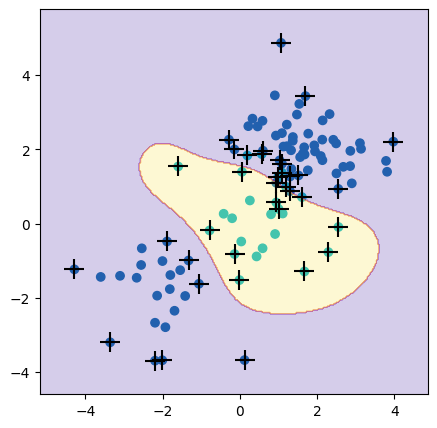

In [170]:
best_svm = grid.best_estimator_
fig, ax = subplots(figsize=(5,5))
plot_svm(X_train,y_train,best_svm,ax=ax)
y_hat_test = best_svm.predict(X_test)
confusion_table(y_hat_test, y_test)

# Curva ROC:

    SVMs e classificadores de vetores de suporte geram rótulos de
    classe para cada observação. No entanto, também é possível obter
    valores ajustados para cada observação, que são os escores numéricos
    usados para obter os rótulos de classe. Por exemplo, no caso de um
    classificador de vetor de suporte, o valor ajustado para uma observação
    X = (X1, X2,...,Xp)T assume a forma β0 + β1X1 + β2X2 +...+ βpXp.
    Para uma SVM com um kernel não linear, a equação que gera o valor
    ajustado é fornecida em (9.23). O sinal do valor ajustado determina
    em qual lado da fronteira de decisão a observação se encontra.
    Portanto, a relação entre o valor ajustado e a predição de classe
    para uma determinada observação é simples: se o valor ajustado exceder
    zero, então a observação é atribuída a uma classe, e se for menor que
    zero, então é atribuída à outra. Ao alterar este limiar de zero para
    algum valor positivo, inclinamos as classificações a favor de uma
    classe versus a outra. Ao considerar uma variedade desses limiares,
    positivos e negativos, produzimos os elementos necessários para um
    gráfico ROC. Podemos acessar esses valores chamando o método
    decision_function() de um estimador SVM ajustado.

    A função ROCCurveDisplay.from_estimator() (que abreviamos para roc_curve())
    produzirá um gráfico de uma curva ROC. Ela recebe um estimador ajustado
    roc_curve() como seu primeiro argumento, seguido por uma matriz de modelo
    X e rótulos y. O argumento name é usado na legenda, enquanto color é usado
    para a cor da linha. Os resultados são plotados em nosso objeto de eixo ax.

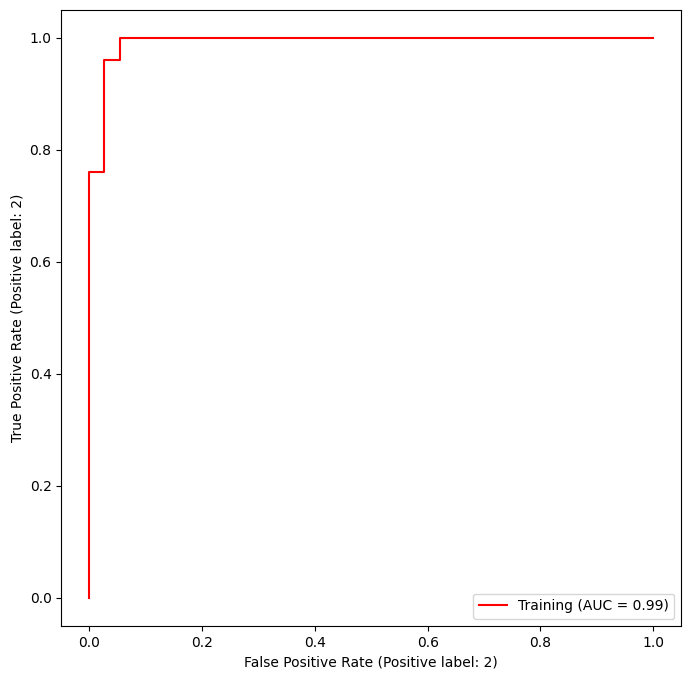

In [171]:
fig, ax = subplots(figsize=(8,8))
roc_curve(best_svm,X_train,y_train,name='Training',color='r',ax=ax);

    Neste exemplo, a SVM parece fornecer previsões precisas. Ao aumentar
    γ, podemos produzir um ajuste mais flexível e gerar melhorias adicionais
    na precisão.

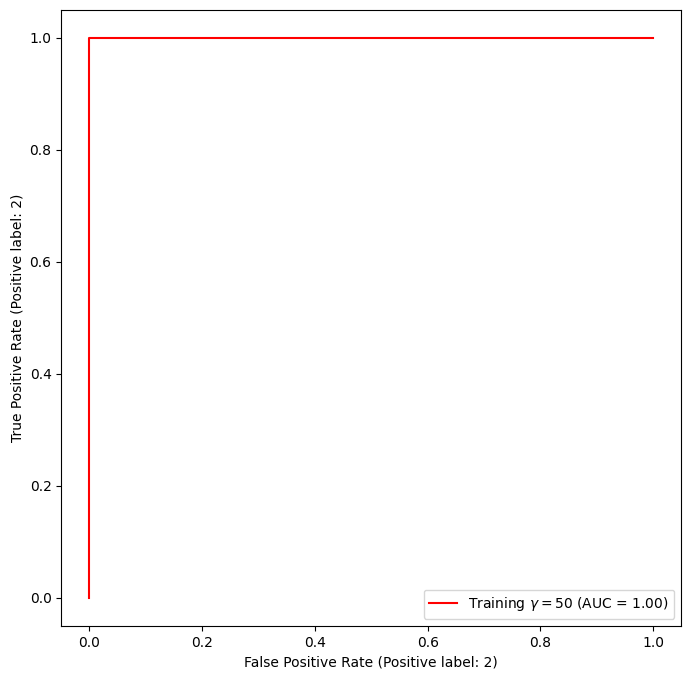

In [172]:
# Instanciando novo modelo e ajustando aos dados:
svm_flex = SVC(kernel="rbf",gamma=50,C=1).fit(X_train, y_train)

fig, ax = subplots(figsize=(8,8))
roc_curve(svm_flex,X_train,y_train,name='Training $\gamma=50$',
          color='r',ax=ax);


    No entanto, note que essas curvas ROC estão todas nos dados de
    treinamento. O nível de precisão de previsão que realmente interessa
    é o nivel de precisão do modelo quanto aos teste. Ao calcular as
    curvas ROC nos dados de teste, o modelo com γ = 0.5 parece fornecer
    os resultados mais precisos

In [173]:
roc_curve(svm_flex,X_test,y_test,name='Test $\gamma=50$',color='b',ax=ax)
fig;

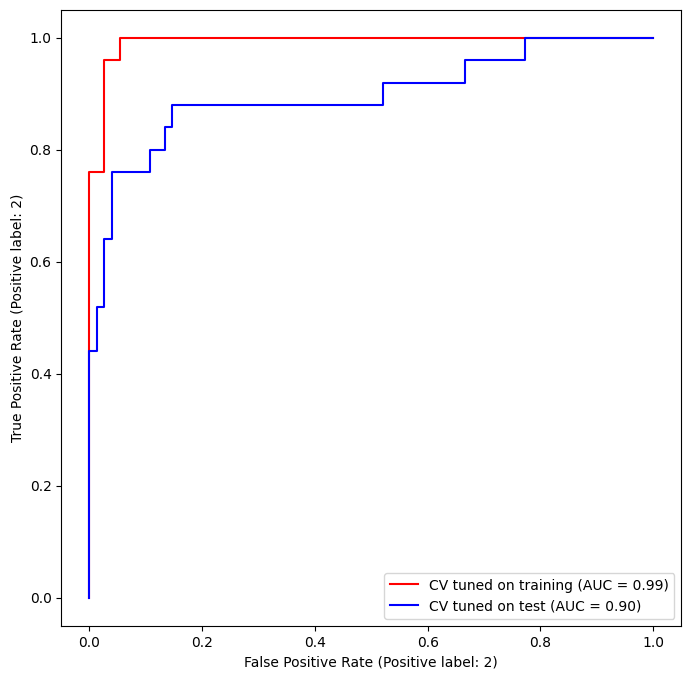

In [174]:
fig, ax = subplots(figsize=(8,8))
for (X_, y_, c, name) in zip((X_train, X_test),(y_train, y_test),('r', 'b'),
                             ('CV tuned on training','CV tuned on test')):
                             roc_curve(best_svm,X_,y_,
                                       name=name,ax=ax,color=c)

# SVM com multiplas classes:

    Se a resposta for um fator contendo mais de dois níveis, então a
    função SVC() realizará uma classificação multiclasse usando a
    abordagem um-contra-um (quando decision_function_shape=='ovo')
    ou um-contra-o-resto (quando decision_function_shape=='ovr').
    Exploramos essa configuração brevemente aqui, gerando uma
    terceira classe de observações.

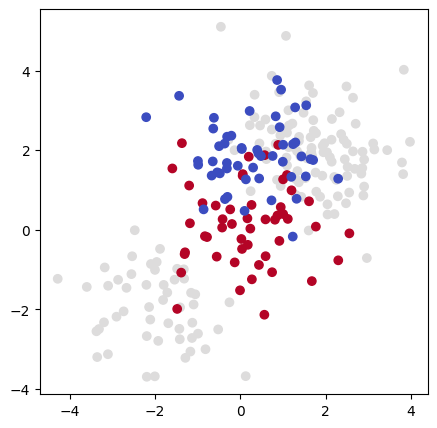

In [175]:
# Gerando dados artificialmente
rng = np.random.default_rng(123)
X = np.vstack([X, rng.standard_normal((50, 2))])
y = np.hstack([y, [0]*50])
X[y==0,1] += 2
fig, ax = subplots(figsize=(5,5))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm);

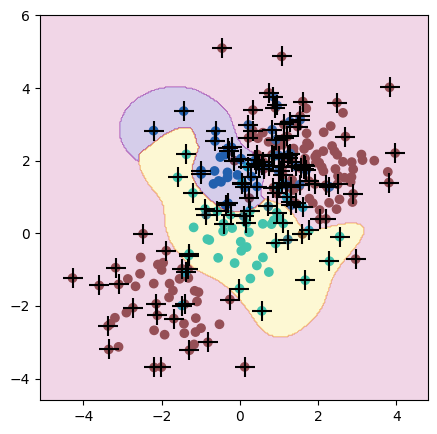

In [176]:
svm_rbf_3 = SVC(kernel="rbf",C=10,gamma=1,decision_function_shape='ovo').fit(X, y);
fig, ax = subplots(figsize=(5,5))
plot_svm(X,y,svm_rbf_3,scatter_cmap=cm.tab10,ax=ax)

    A biblioteca sklearn.svm também pode ser usada para realizar
    regressão de vetor de suporte com uma resposta numérica usando
    o estimador SupportVectorRegression().

# Aplicando os conhecimentos:

In [177]:
import pandas as pd

In [178]:
Khan = load_data('Khan')
Khan['xtrain'].shape, Khan['xtest'].shape

((63, 2308), (20, 2308))

In [179]:
khan_linear = SVC(kernel='linear', C=10)
khan_linear.fit(Khan['xtrain'], Khan['ytrain'])
confusion_table(khan_linear.predict(Khan['xtrain']),
Khan['ytrain'])

Truth,1,2,3,4
Predicted,,,,
1,8,0,0,0
2,0,23,0,0
3,0,0,12,0
4,0,0,0,20


In [181]:
confusion_table(khan_linear.predict(Khan['xtest']),Khan['ytest'])

Truth,1,2,3,4
Predicted,,,,
1,3,0,0,0
2,0,6,2,0
3,0,0,4,0
4,0,0,0,5
